In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("weatherAUS_Rain_MM.csv")

In [3]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


In [4]:
df1.shape

(36881, 23)

In [5]:
df1.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [7]:
df1[df1.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM


<AxesSubplot:>

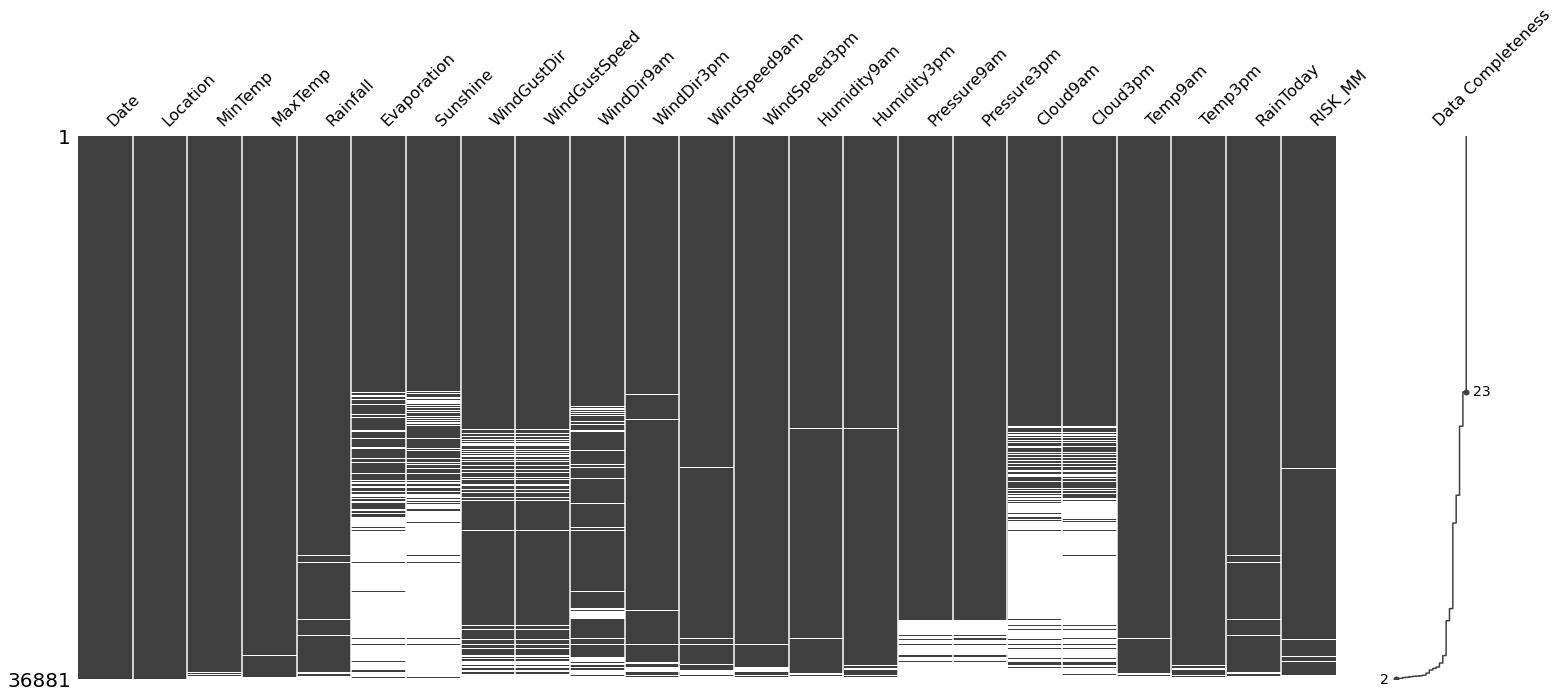

In [8]:
import missingno as msno
msno.matrix(df1,labels=True, sort="descending")

In [9]:
df=df1[~df1["RISK_MM"].isnull()==True]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,3.4,0.0,NNE,46.0,NNE,...,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,9.0
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,...,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,0.0
36878,05-06-2011,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,...,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,0.0
36879,10-12-2010,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,...,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,0.0


<AxesSubplot:title={'center':'Unique values per feature'}>

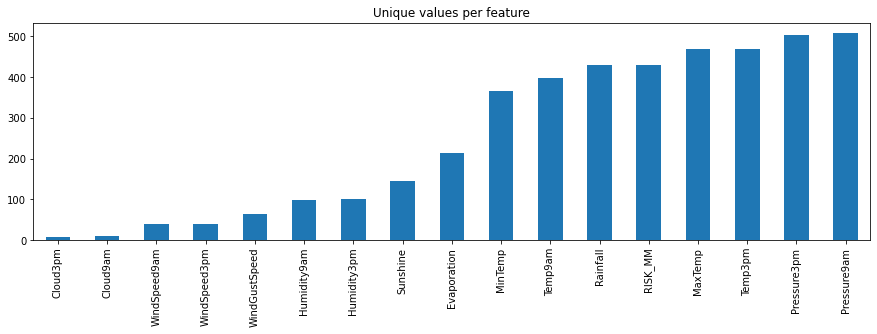

In [10]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")

In [11]:
df.select_dtypes(include="number").shape[1]

17

In [12]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,5/18/2009,Hobart,NW,WSW,SSE,No
1,07-03-2009,Launceston,SSW,E,SW,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No
3,03-04-2010,PerthAirport,SW,SSE,SW,No
4,09-09-2010,GoldCoast,NNW,WNW,N,No


In [13]:
df.describe(exclude="number")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,36261,36261,33239,33647,35460,35912
unique,1473,46,16,16,16,2
top,03-03-2009,Canberra,SE,N,SE,No
freq,41,1077,2389,2820,2921,27505


In [14]:
categorical=[]
for col in df.columns:
    if df[col].dtype == "O":
        categorical.append(col)
print(f"There are {len(categorical)} categorical variables, --> {categorical}")

There are 6 categorical variables, --> ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [15]:
df[categorical].isnull().sum()

Date              0
Location          0
WindGustDir    3022
WindDir9am     2614
WindDir3pm      801
RainToday       349
dtype: int64

In [16]:
for cat in categorical:
    print(cat, ' contains ', df[cat].nunique(), ' labels')

Date  contains  1473  labels
Location  contains  46  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels


In [17]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

# Date

In [18]:
df["Date"].dtype

dtype('O')

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2009
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [21]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    5
1    7
2    2
3    3
4    9
Name: Month, dtype: int64

In [22]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    18
1     3
2    18
3     4
4     9
Name: Day, dtype: int64

In [23]:
df.drop('Date', axis=1, inplace = True)

In [24]:
df.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,...,1002.4,NaN,NaN,1.3,13.7,No,0.0,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,...,1015.0,NaN,NaN,22.2,22.6,No,0.4,2010,9,9
5,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,SW,...,995.5,8.0,7.0,18.1,18.5,No,5.6,2011,9,28
6,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,NNE,...,1013.9,3.0,4.0,15.5,23.0,No,0.2,2011,10,13
7,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,S,...,1011.0,NaN,NaN,22.4,24.0,Yes,0.2,2010,4,8
8,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,E,...,1018.0,4.0,2.0,27.4,27.9,No,0.0,2009,10,19
9,MountGambier,8.5,22.9,1.4,4.2,12.5,SSW,41.0,SSE,SSE,...,1022.1,1.0,2.0,16.4,22.1,Yes,0.0,2010,2,23


# Location

In [25]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 46 labels


In [26]:
df.Location.unique()

array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'CoffsHarbour', 'MountGinini', 'Sale', 'PearceRAAF',
       'Adelaide', 'Albury', 'Richmond', 'Walpole', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Woomera', 'Penrith', 'WaggaWagga',
       'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane', 'Witchcliffe'], dtype=object)

<AxesSubplot:>

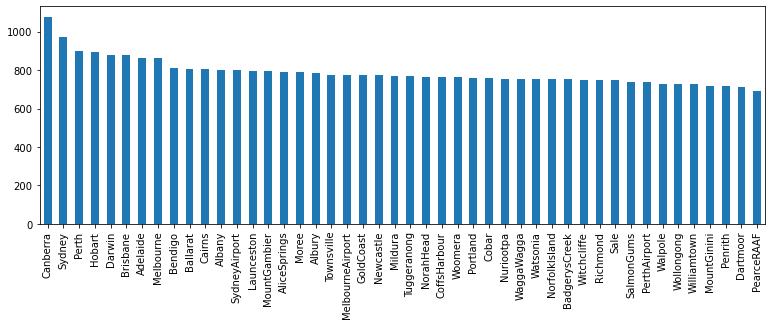

In [27]:
plt.figure(figsize =(13, 4))
df["Location"].value_counts().plot(kind="bar")

# WindGustDir

In [28]:
print('WindGustDir', len(df.WindGustDir.unique()), 'labels')

WindGustDir 17 labels


In [29]:
df['WindGustDir'].unique()

array(['NW', 'SSW', 'SSE', 'SW', 'NNW', 'N', 'SE', 'E', 'S', 'WSW', 'W',
       nan, 'NE', 'NNE', 'WNW', 'ESE', 'ENE'], dtype=object)

<AxesSubplot:>

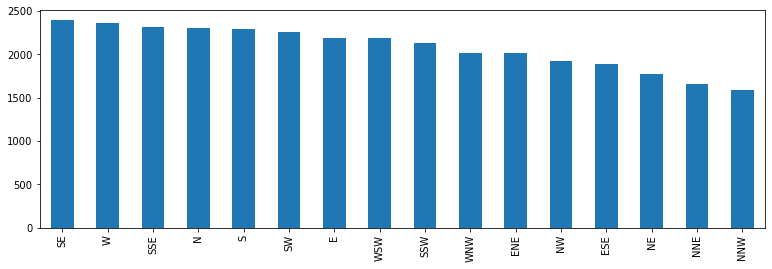

In [30]:
plt.figure(figsize =(13, 4))
df["WindGustDir"].value_counts().plot(kind="bar")

# WindDir9am

In [31]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [32]:
df['WindDir9am'].unique()

array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

<AxesSubplot:>

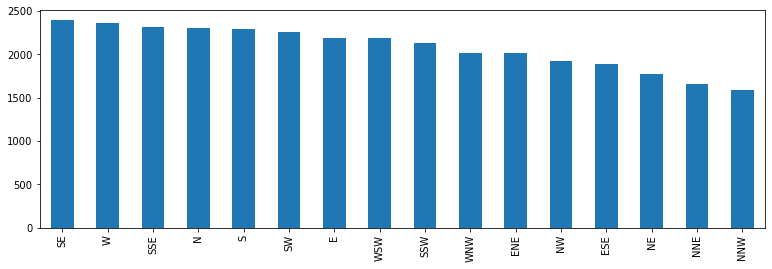

In [33]:
plt.figure(figsize =(13, 4))
df["WindGustDir"].value_counts().plot(kind="bar")

# RainToday

In [34]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [35]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

<AxesSubplot:>

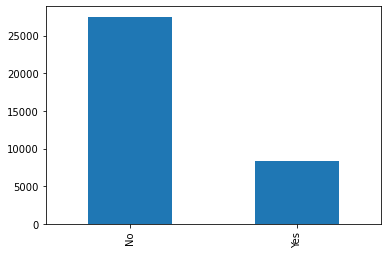

In [36]:
df.RainToday.value_counts().plot(kind="bar")

# Numerical Variables

In [37]:
numerical=[]
for num in df.columns:
    if df[num].dtype != "O":
        numerical.append(num)
print(f"There are {len(numerical)} numerical variables, --> {numerical}")

There are 20 numerical variables, --> ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


<AxesSubplot:>

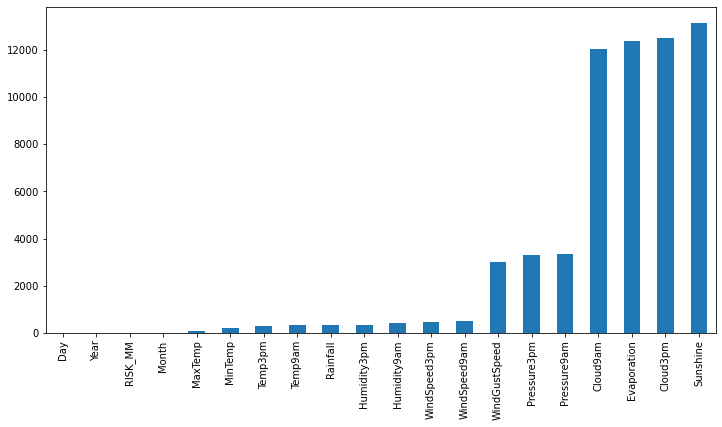

In [38]:
plt.figure(figsize=(12,6))
df[numerical].isnull().sum().sort_values().plot(kind="bar")

In [39]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,36056.0,12.252549,6.387194,-8.5,7.6,12.1,17.000,30.5
MaxTemp,36176.0,22.968045,6.978047,-3.1,17.8,22.4,27.925,48.1
Rainfall,35912.0,2.548953,9.075119,0.0,0.0,0.0,0.800,371.0
Evaporation,23869.0,5.192928,3.771129,0.0,2.6,4.6,7.000,81.2
Sunshine,23106.0,7.545516,3.832795,0.0,4.7,8.4,10.600,14.3
WindGustSpeed,33246.0,40.382572,13.537023,7.0,31.0,39.0,48.000,135.0
WindSpeed9am,35755.0,14.213453,8.986999,0.0,7.0,13.0,20.000,87.0
WindSpeed3pm,35771.0,18.881077,8.795042,0.0,13.0,19.0,24.000,87.0
Humidity9am,35845.0,69.109137,18.306222,2.0,57.0,70.0,83.000,100.0
Humidity3pm,35903.0,52.255466,20.323059,1.0,38.0,53.0,66.000,100.0


In [40]:
cor=df[numerical].corr()

<AxesSubplot:>

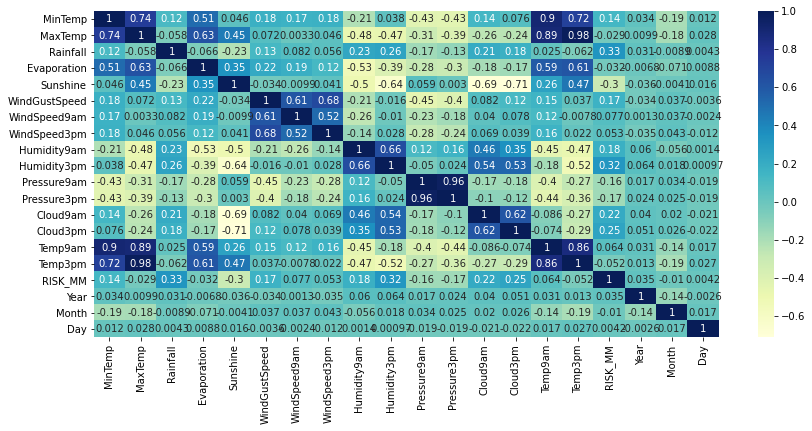

In [41]:
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

Text(0, 0.5, 'WindSpeed3pm')

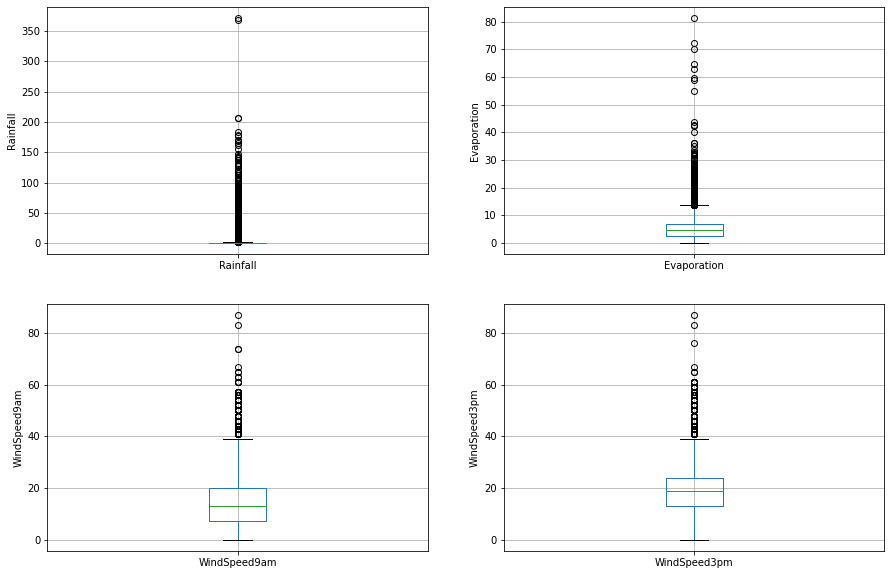

In [42]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0.5, 0, 'WindSpeed3pm')

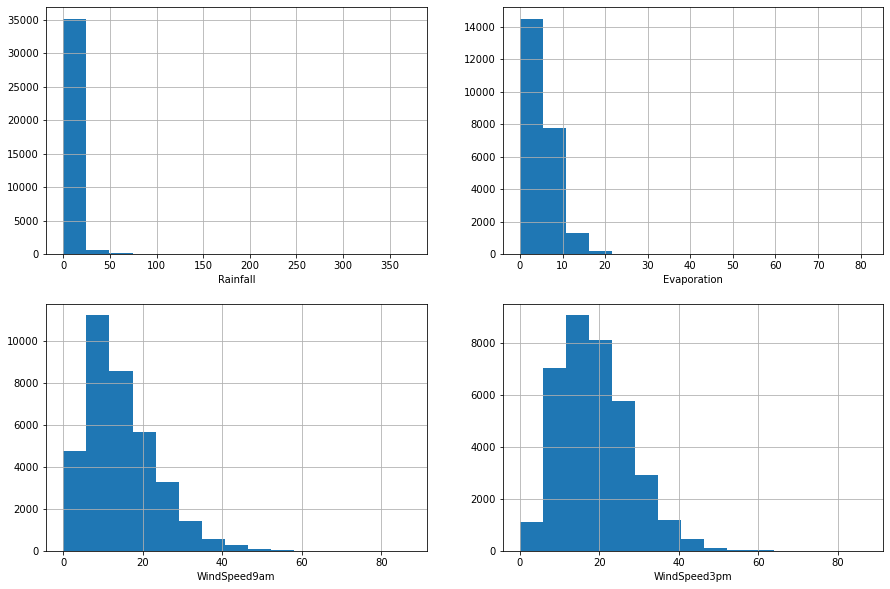

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=15)
fig.set_xlabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=15)
fig.set_xlabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=15)
fig.set_xlabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=15)
fig.set_xlabel('WindSpeed3pm')

In [44]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print(f'Rainfall outliers are values < {Lower_fence} or > {Upper_fence}.')

Rainfall outliers are values < -2.4000000000000004 or > 3.2.


In [45]:
df[df["Rainfall"] < -2.4]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [46]:
df[df["Rainfall"] >3.2]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
15,Launceston,10.7,18.0,6.0,NaN,NaN,W,33.0,SSE,NW,...,1000.1,NaN,NaN,14.7,15.9,Yes,6.0,2009,11,22
21,NorahHead,13.8,19.2,18.6,NaN,NaN,SSE,61.0,SE,S,...,1021.4,NaN,NaN,15.9,15.6,Yes,10.8,2010,11,5
23,Launceston,14.4,21.1,4.4,NaN,NaN,N,57.0,ENE,N,...,1005.8,NaN,NaN,21.0,17.4,Yes,3.0,2010,10,31
33,Adelaide,12.5,20.0,4.2,NaN,9.9,SW,33.0,S,WSW,...,1022.3,NaN,NaN,16.2,19.7,Yes,0.0,2010,4,25
34,Albury,6.9,13.7,4.4,NaN,NaN,SE,46.0,ESE,ESE,...,1008.1,7.0,NaN,8.4,13.0,Yes,0.0,2009,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36867,Sydney,19.2,27.4,17.0,8.4,6.6,NaN,NaN,WNW,E,...,1007.8,2.0,3.0,21.7,25.0,Yes,0.4,2009,3,15
36868,Albany,18.2,19.5,12.6,5.4,0.0,NaN,NaN,S,SSE,...,1013.8,8.0,7.0,18.8,19.0,Yes,0.0,2010,1,25
36869,Witchcliffe,7.8,19.4,7.8,NaN,NaN,WSW,28.0,NNW,SW,...,1006.8,NaN,NaN,13.0,17.7,Yes,1.8,2009,6,25
36872,Watsonia,9.3,18.2,14.2,4.0,10.2,WSW,24.0,NaN,SE,...,1018.9,4.0,0.0,12.4,17.5,Yes,0.0,2009,9,18


In [47]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print(f'Evaporation outliers are values < {Lower_fence} or > {Upper_fence}.')

Evaporation outliers are values < -10.600000000000001 or > 20.200000000000003.


In [48]:
df[df["Evaporation"] < -10.6]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [49]:
df[df["Evaporation"] > 20.2]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
62,Woomera,24.4,43.6,0.0,32.2,NaN,SSW,52.0,NNE,WSW,...,1005.8,0.0,NaN,33.8,41.0,No,0.0,2011,12,24
438,Moree,14.4,30.0,0.0,20.4,11.8,E,37.0,E,E,...,1017.2,1.0,3.0,20.9,28.7,No,0.0,2011,3,7
1817,Cobar,7.7,24.5,0.0,24.6,NaN,E,48.0,E,ENE,...,1015.9,6.0,1.0,15.8,23.3,No,0.0,2011,9,26
2078,AliceSprings,30.3,40.5,0.0,20.8,7.0,WSW,61.0,WNW,SSW,...,1003.6,3.0,5.0,35.9,39.0,No,0.0,2009,11,18
2334,Richmond,15.4,28.2,0.0,21.0,NaN,ESE,37.0,SSE,ENE,...,1011.6,NaN,NaN,21.3,27.4,No,0.0,2010,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34905,Nuriootpa,19.1,36.7,0.0,25.8,6.1,WNW,69.0,N,NW,...,1010.6,6.0,7.0,29.4,36.0,No,0.0,2009,11,2
34940,Mildura,16.4,29.7,0.0,21.0,11.8,S,52.0,S,SSW,...,1015.8,4.0,4.0,18.4,25.9,No,0.0,2009,1,15
35046,Adelaide,18.2,26.1,0.0,22.6,9.8,SSE,39.0,S,S,...,1015.4,NaN,NaN,20.3,24.9,No,0.0,2010,2,15
36422,Richmond,9.2,21.5,0.0,30.2,NaN,W,44.0,W,W,...,1006.0,NaN,NaN,16.1,20.9,No,0.0,2009,9,28


In [50]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print(f'WindSpeed9am outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed9am outliers are values < -32.0 or > 59.0.


In [51]:
df[df["WindSpeed9am"] < -10.6]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [52]:
df[df["WindSpeed9am"] > 20.2]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
8,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,E,...,1018.0,4.0,2.0,27.4,27.9,No,0.0,2009,10,19
21,NorahHead,13.8,19.2,18.6,NaN,NaN,SSE,61.0,SE,S,...,1021.4,NaN,NaN,15.9,15.6,Yes,10.8,2010,11,5
22,Darwin,24.9,33.2,0.0,7.2,8.0,E,48.0,ESE,E,...,1008.6,4.0,7.0,27.9,32.2,No,0.0,2010,5,3
24,CoffsHarbour,20.3,30.0,0.0,7.0,NaN,NNE,57.0,NNW,NE,...,1008.4,6.0,3.0,25.6,27.1,No,0.0,2011,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,SalmonGums,14.2,29.0,0.0,NaN,NaN,WSW,52.0,NNW,WSW,...,NaN,NaN,NaN,27.5,21.0,No,0.4,2009,10,10
36861,WaggaWagga,17.8,23.4,0.0,4.6,7.1,WSW,46.0,WSW,SW,...,1009.5,7.0,5.0,19.5,22.1,No,0.0,2011,3,1
36863,Wollongong,12.8,15.9,1.0,NaN,NaN,SE,43.0,S,ESE,...,1036.4,8.0,8.0,14.1,14.1,No,3.4,2010,6,22
36868,Albany,18.2,19.5,12.6,5.4,0.0,NaN,NaN,S,SSE,...,1013.8,8.0,7.0,18.8,19.0,Yes,0.0,2010,1,25


In [53]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print(f'WindSpeed3pm outliers are values < {Lower_fence} or > {Upper_fence}.')

WindSpeed3pm outliers are values < -20.0 or > 57.0.


In [54]:
df[df["WindSpeed9am"] < -20.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day


In [55]:
df[df["WindSpeed9am"] >57.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
1412,Newcastle,16.4,19.5,0.0,NaN,NaN,NaN,NaN,NW,NW,...,NaN,0.0,2.0,16.6,19.0,No,0.0,2009,9,23
2887,MelbourneAirport,8.8,17.5,0.0,4.0,6.5,N,89.0,N,N,...,1009.2,7.0,1.0,10.4,16.9,No,0.0,2009,8,15
5911,SydneyAirport,11.7,16.4,1.8,3.4,9.3,W,93.0,WNW,WSW,...,1004.0,3.0,3.0,12.4,15.7,Yes,0.0,2010,10,16
9522,Newcastle,16.0,21.8,1.2,NaN,NaN,NaN,NaN,NW,NW,...,NaN,1.0,4.0,18.2,21.2,Yes,0.0,2010,9,5
10732,MelbourneAirport,14.0,26.6,0.0,8.8,6.2,N,80.0,N,N,...,1006.4,7.0,8.0,18.6,24.6,No,11.4,2011,10,28
15775,Sale,6.6,16.9,0.0,4.4,7.2,W,104.0,WSW,WSW,...,1008.5,6.0,6.0,14.4,13.7,No,0.2,2009,4,15
17236,Newcastle,9.2,19.4,0.0,NaN,NaN,NaN,NaN,NW,NW,...,NaN,2.0,1.0,14.5,18.5,No,0.0,2009,9,27
19775,Wollongong,16.3,21.3,3.6,NaN,NaN,WNW,126.0,WNW,WSW,...,1009.9,NaN,NaN,17.4,20.0,Yes,0.0,2010,9,5
19998,Melbourne,10.5,19.3,0.0,4.0,6.5,N,89.0,N,N,...,1010.3,5.0,2.0,12.7,18.2,No,0.0,2009,8,15
21091,Townsville,23.3,28.6,NaN,NaN,1.2,E,135.0,ENE,ENE,...,1006.0,8.0,8.0,27.2,26.7,NaN,170.4,2011,2,3


# Imputation of Missing values

In [56]:
for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)

In [57]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Year             0
Month            0
Day              0
dtype: int64

In [58]:
categorical1=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"] 

In [59]:
for col in categorical1:
    col_mode=df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [60]:
df[categorical1].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [61]:
def outliers_remove(col,top):
    return np.where(df[col]>top,top,df[col])

In [62]:
df["Rainfall"]=outliers_remove("Rainfall",3.2)

array([[<AxesSubplot:title={'center':'Rainfall'}>]], dtype=object)

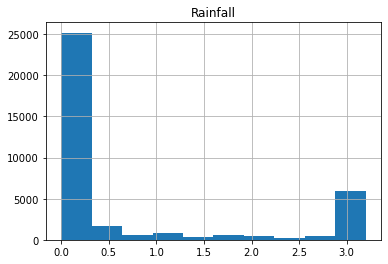

In [63]:
df.hist("Rainfall")

In [64]:
df["Rainfall"]

0        0.0
1        0.4
2        0.0
3        0.0
4        0.0
        ... 
36876    3.2
36877    0.0
36878    0.0
36879    0.0
36880    0.0
Name: Rainfall, Length: 36261, dtype: float64

In [65]:
df["Rainfall"].describe()

count    36261.000000
mean         0.709512
std          1.207785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max          3.200000
Name: Rainfall, dtype: float64

In [66]:
df["Evaporation"]=outliers_remove("Evaporation",20.2)

In [67]:
df["Evaporation"].describe()

count    36261.000000
mean         4.965806
std          2.841683
min          0.000000
25%          3.600000
50%          4.600000
75%          5.600000
max         20.200000
Name: Evaporation, dtype: float64

In [68]:
df["WindSpeed9am"]=outliers_remove("WindSpeed9am",59.0)

In [69]:
df["WindSpeed9am"].describe()

count    36261.000000
mean        14.193265
std          8.905769
min          0.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         59.000000
Name: WindSpeed9am, dtype: float64

In [70]:
df["WindSpeed3pm"]=outliers_remove("WindSpeed3pm",57.0)

In [71]:
df["WindSpeed3pm"].describe()

count    36261.000000
mean        18.878630
std          8.714056
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         57.000000
Name: WindSpeed3pm, dtype: float64

In [72]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'Year', 'Month', 'Day'],
      dtype='object')

In [73]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1022.2,1.0,1.0,9.1,13.3,No,0.0,2009,5,18
1,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,...,1002.4,5.0,5.0,1.3,13.7,No,0.0,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1021.9,6.0,4.0,22.7,24.4,No,0.2,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1014.9,6.0,1.0,20.0,26.1,No,0.0,2010,3,4
4,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,...,1015.0,5.0,5.0,22.2,22.6,No,0.4,2010,9,9


In [74]:
df[numerical]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0.0,2009,5,18
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,0.0,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0.2,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0.0,2010,3,4
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,0.4,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,3.2,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,9.0,2011,6,14
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,0.0,2010,9,24
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,0.0,2011,5,6
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,0.0,2010,10,12


In [75]:
df[categorical1]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Hobart,NW,WSW,SSE,No
1,Launceston,SSW,E,SW,No
2,Williamtown,SSE,SSE,SSE,No
3,PerthAirport,SW,SSE,SW,No
4,GoldCoast,NNW,WNW,N,No
...,...,...,...,...,...
36876,Perth,NNE,NNE,N,Yes
36877,PerthAirport,W,N,WSW,No
36878,Darwin,E,E,ESE,No
36879,Perth,SSW,E,SSW,No


In [76]:
X=df.drop("RISK_MM",axis=1)
y=df["RISK_MM"]

In [77]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,...,1023.1,1022.2,1.0,1.0,9.1,13.3,No,2009,5,18
1,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,...,1001.5,1002.4,5.0,5.0,1.3,13.7,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,...,1020.9,1021.9,6.0,4.0,22.7,24.4,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,...,1018.3,1014.9,6.0,1.0,20.0,26.1,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,...,1020.3,1015.0,5.0,5.0,22.2,22.6,No,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,Perth,10.1,14.2,3.2,3.4,0.0,NNE,46.0,NNE,N,...,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,2011,6,14
36877,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,WSW,...,1024.2,1021.5,1.0,1.0,18.4,23.5,No,2010,9,24
36878,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,ESE,...,1012.6,1009.0,2.0,5.0,25.7,30.5,No,2011,5,6
36879,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,SSW,...,1023.9,1019.9,0.0,1.0,16.4,20.9,No,2010,10,12


In [78]:
y

0        0.0
1        0.0
2        0.2
3        0.0
4        0.4
        ... 
36876    9.0
36877    0.0
36878    0.0
36879    0.0
36880    0.0
Name: RISK_MM, Length: 36261, dtype: float64

In [79]:
X_numerical=X.drop(["RainToday","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1)

In [80]:
X_numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

In [81]:
X_numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,2010,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,3.2,3.4,0.0,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,2011,6,14
36877,6.3,26.0,0.0,5.0,10.6,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,2010,9,24
36878,20.5,31.7,0.0,7.0,11.1,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,2011,5,6
36879,6.3,23.3,0.0,5.2,11.6,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,2010,10,12


In [82]:
X_1 = pd.concat([X_numerical,
                pd.get_dummies(X.RainToday,drop_first=True),
                pd.get_dummies(X.Location,drop_first=True), 
                pd.get_dummies(X.WindGustDir,drop_first=True),
                pd.get_dummies(X.WindDir9am,drop_first=True),
                pd.get_dummies(X.WindDir3pm,drop_first=True)],axis=1)

In [83]:
X_1.shape

(36261, 110)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_1.columns
  
# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_1.values, i)
                          for i in range(len(X_1.columns))]
  
print(vif_data)

         feature         VIF
0        MinTemp   52.782356
1        MaxTemp  352.125576
2       Rainfall   15.855559
3    Evaporation    7.708782
4       Sunshine   17.550938
..           ...         ...
105          SSW    2.388363
106           SW    2.721529
107            W    2.799529
108          WNW    2.624500
109          WSW    2.758602

[110 rows x 2 columns]


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3,random_state=1)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred=model.predict(X_test)

In [89]:
from sklearn.metrics import r2_score, mean_squared_error
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [90]:
r2_scr

0.21161023638337306

In [91]:
mse

55.972455082910926

# Ridge Regression

In [92]:
from sklearn.linear_model import Ridge

In [93]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [94]:
y_pred=clf.predict(X_test)

In [95]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [96]:
r2_scr

0.21161664707067762

In [97]:
mse

55.97199995028013

# Lasso Regression

In [98]:
from sklearn.linear_model import Lasso

In [99]:
clf1 = Lasso(alpha=1.0)
clf1.fit(X_train, y_train)

Lasso()

In [100]:
y_pred=clf1.predict(X_test)

In [101]:
r2_scr = r2_score(y_test,y_pred) 
mse = mean_squared_error(y_test, y_pred)

In [102]:
r2_scr

0.18704146540811495

In [103]:
mse

57.71673753471058